# Load Libraries/Data

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [28]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None, ax=ax):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [3]:
df = pd.read_csv('Data/london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# Part 1

## 1. Convert the date column to datetime dtype

In [5]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


## 2. Set the date column as the index

In [6]:
df = df.set_index('datetime')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [7]:
df.drop(columns='date', inplace=True)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 3. Filter out only the required data

- Keep only data from the year 2000 or later.


- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

### Filter Years

In [8]:
df.index.strftime('%Y').unique()

Index(['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='datetime')

In [9]:
df = df.loc['2000':]
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [10]:
df.index.strftime('%Y').unique()

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object', name='datetime')

### Filter Features

In [11]:
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## 4. Impute any missing values

In [12]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [13]:
((df.isna().sum() / len(df)) * 100).round(2)

precipitation     5.08
mean_temp         5.46
min_temp          5.03
max_temp          5.08
snow_depth       22.84
dtype: float64

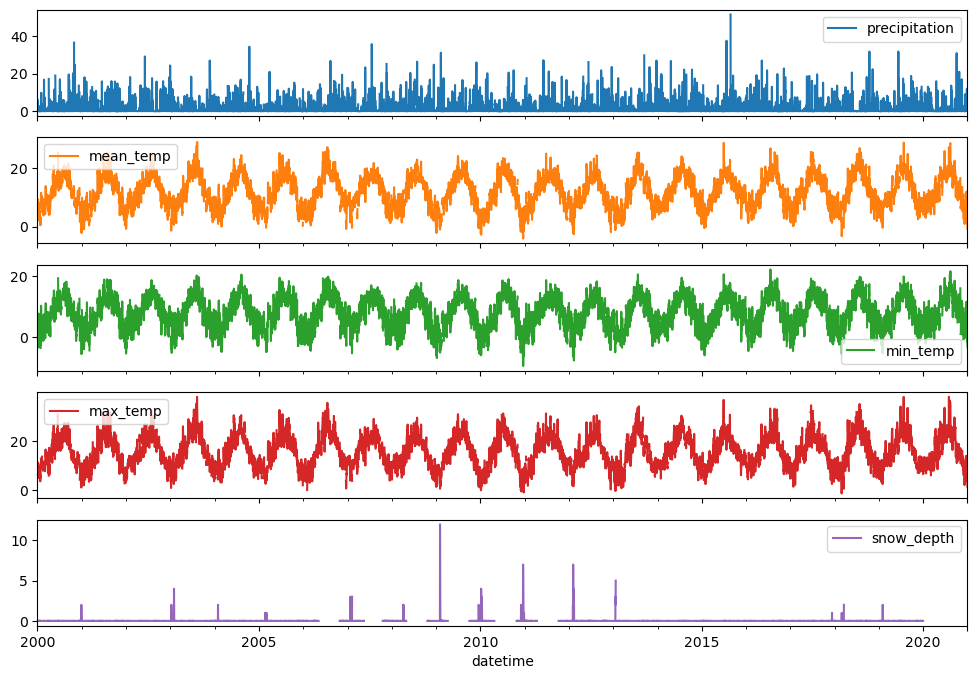

In [14]:
df.plot(figsize=(12,8), subplots=True);

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64


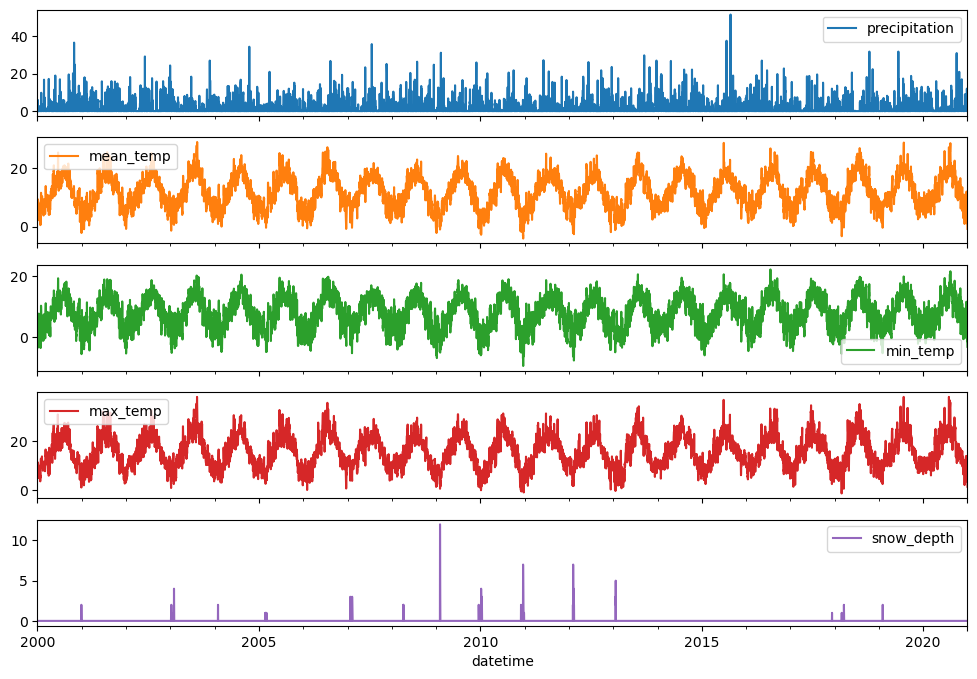

In [15]:
df_interp = df.interpolate()
print(df_interp.isna().sum())

df_interp.plot(figsize=(12,8), subplots=True);

In [16]:
df = df.interpolate()
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2

- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.


- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period

## Q1:  What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.


- Find the date and corresponding value for the max precipitation.


- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!


-  Determine the date and value for the most precipitation (the max precipitation).


- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

In [17]:
df_month = df.copy()
df_month.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq=None)

### Resample as Monthly Frequency

In [18]:
df_month = df_month.asfreq('MS')
df_month.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='datetime', length=252, freq='MS')

In [19]:
df_month.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-02-01,9.8,9.9,9.1,10.6,0.0
2000-03-01,0.2,5.4,1.6,11.2,0.0
2000-04-01,0.6,6.8,1.7,13.7,0.0
2000-05-01,0.0,12.0,7.5,14.6,0.0


### Date and Value for Max Precipitation

In [20]:
df_month.loc[df_month['precipitation'].idxmax()]

precipitation    16.0
mean_temp         8.3
min_temp          3.7
max_temp         11.3
snow_depth        0.0
Name: 2003-01-01 00:00:00, dtype: float64

In [21]:
precipitation, mean_temp, min_temp, max_temp, snow_depth = df_month.loc[df_month['precipitation'].idxmax()]

In [22]:
date = df_month.loc[df_month['precipitation'].idxmax()].name.date()
print(date)

2003-01-01


In [23]:
print(f'Date of highest precipitation: {date}')
print(f'Precipitation: {precipitation}')

Date of highest precipitation: 2003-01-01
Precipitation: 16.0


### Visualization

In [39]:
ts_2010 = df_month['precipitation'].loc['2000':'2010']
ts_2010

datetime
2000-01-01     0.000000
2000-02-01     9.800000
2000-03-01     0.200000
2000-04-01     0.600000
2000-05-01     0.000000
                ...    
2010-08-01     0.000000
2010-09-01     0.000000
2010-10-01    10.400000
2010-11-01     2.266667
2010-12-01     2.200000
Freq: MS, Name: precipitation, Length: 132, dtype: float64

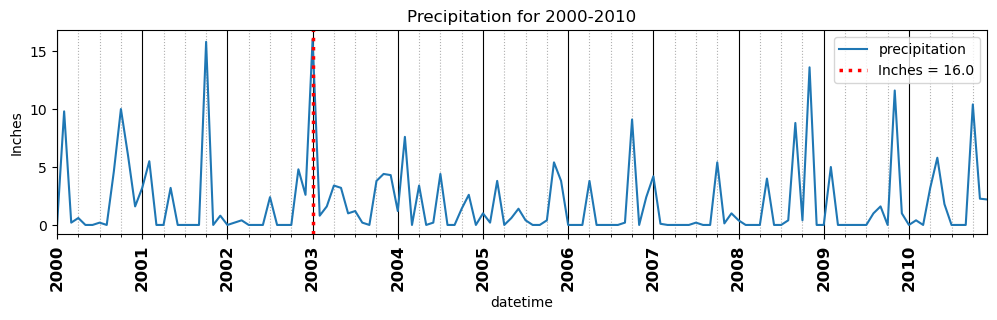

In [40]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Precipitation for 2000-2010')

ts_2010.plot(style='-')


## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), 
                   fontsize='large', 
                   fontweight='bold') 


## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.axvline(date ,color='red',lw=2.5, ls=':', label=f'Inches = {precipitation}')

plt.ylabel('Inches')

ax.legend(bbox_to_anchor=[1,1]);

## Q2 : Which year between 2000-2020 had the coolest average temperature?

In [87]:
df_year = df.copy()

### Resample as Yearly Frequency

In [88]:
df_year = df_year.asfreq('AS')
df_year.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='datetime', freq='AS-JAN')

### Date and Value for Coolest Average Temperature

In [89]:
df_year.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2001-01-01,3.2,5.3,-0.5,10.8,0.0
2002-01-01,0.0,-0.8,-5.3,4.2,0.0
2003-01-01,16.0,8.3,3.7,11.3,0.0
2004-01-01,1.2,4.3,0.6,4.7,0.0


In [90]:
df_year.loc[df_year['mean_temp'].idxmin()]

precipitation    0.0
mean_temp       -0.8
min_temp        -5.3
max_temp         4.2
snow_depth       0.0
Name: 2002-01-01 00:00:00, dtype: float64

In [69]:
precipitation2, mean_temp2, min_temp2, max_temp2, snow_depth2 = df_year.loc[df_year['mean_temp'].idxmin()]

In [70]:
date2 = df_year.loc[df_year['mean_temp'].idxmin()].name.date()
print(date2)

2002-01-01


In [71]:
print(f'Date of highest precipitation: {date2}')
print(f'Precipitation: {mean_temp2}')

Date of highest precipitation: 2002-01-01
Precipitation: -0.8


### Visualization

In [72]:
ts_2020 = df_year['mean_temp']
ts_2020

datetime
2000-01-01     7.0
2001-01-01     5.3
2002-01-01    -0.8
2003-01-01     8.3
2004-01-01     4.3
2005-01-01     8.6
2006-01-01     6.1
2007-01-01     7.4
2008-01-01     7.8
2009-01-01     1.5
2010-01-01     1.6
2011-01-01     5.9
2012-01-01    12.2
2013-01-01     5.7
2014-01-01     8.3
2015-01-01     7.1
2016-01-01     5.6
2017-01-01     7.5
2018-01-01     6.7
2019-01-01     7.8
2020-01-01     4.1
Freq: AS-JAN, Name: mean_temp, dtype: float64

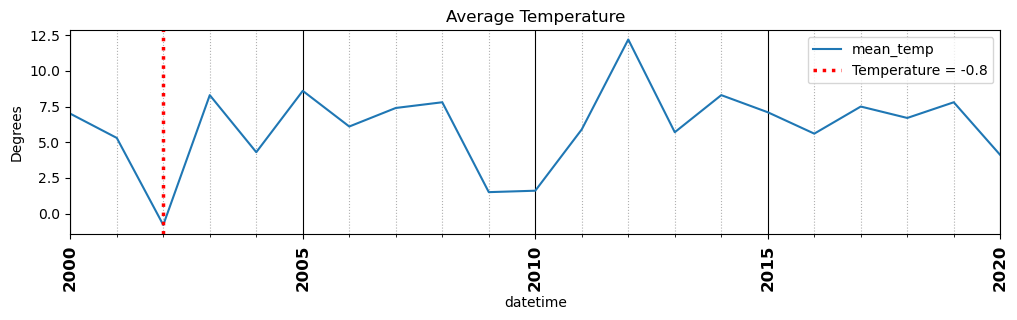

In [73]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Average Temperature')

ts_2020.plot(style='-')


## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), 
                   fontsize='large', 
                   fontweight='bold') 


## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.axvline(date2, color='red',lw=2.5, ls=':', label=f'Temperature = {mean_temp2}')

plt.ylabel('Degrees')

ax.legend(bbox_to_anchor=[1,1]);